## ESM2017-41
* Pandas 활용 실습
* 서울시 공기질 원본 데이터 소스(2018) [서울시 열린 데이터 광장](https://data.seoul.go.kr/dataList/OA-2218/S/1/datasetView.do)

### 필요 패키지 import
pandas + numpy + matplotlib
*%matplotlib inline* 의 경우 matplotlib 로 출력하는 plot을 jupyter notebook 내에서 바로 출력하라는 jupyter notebook 특수 명령어임.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### CSV로 부터 DataFrame 생성하기
* pd.read_csv : csv파일을 읽어서 Pandas Dataframe 생성(parse_date argument : 데이터에 날짜 열이 존재 할 경우 해당 열을 날짜 형식으로 처리함)
* df.head(n) : 데이터의 구조를 살피기 위해 데이터 맨 윗줄 n개를 확인 할 때 사용하는 method

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/skkupython/skkupython.github.io/master/assets/pdf/seoul_air_index.csv", parse_dates=[0])
df.head(10)

,date,location,NO2,O3,CO2,NOx,dust,micro-dust
0,2018-01-01,강남구,0.033,0.010,0.6,0.006,34.0,22.0
1,2018-01-01,강남대로,0.040,0.007,0.8,0.006,NaN,17.0
2,2018-01-01,강동구,0.038,0.010,0.7,0.005,48.0,24.0
3,2018-01-01,강변북로,0.033,0.008,0.6,0.005,48.0,15.0
4,2018-01-01,강북구,0.026,0.018,0.6,0.004,38.0,18.0
5,2018-01-01,강서구,0.036,0.012,0.7,0.004,NaN,13.0
6,2018-01-01,공항대로,0.045,0.007,0.6,0.006,50.0,21.0
7,2018-01-01,관악구,0.036,0.008,0.5,0.008,38.0,23.0
8,2018-01-01,광진구,0.037,0.012,0.7,0.005,41.0,21.0
9,2018-01-01,구로구,0.025,0.008,0.6,0.007,47.0,28.0


### Slicing, Selecting, Extracting
DataFrame에서 데이터 추출하기

In [3]:
# 지역(location)이 '종로' 혹은 '종로구' 인 데이터만을 추출하여 새로운 DataFrame 만들기
df_jongro=df[(df['location'] == '종로구') | (df['location'] == '종로')]
df_jongro.head(10)

,date,location,NO2,O3,CO2,NOx,dust,micro-dust
30,2018-01-01,종로,NaN,NaN,NaN,NaN,NaN,NaN
31,2018-01-01,종로구,0.029,0.016,0.6,0.007,34.0,17.0
69,2018-01-02,종로,NaN,NaN,NaN,NaN,NaN,NaN
70,2018-01-02,종로구,0.044,0.010,0.9,0.007,36.0,22.0
108,2018-01-03,종로,0.024,0.018,0.5,0.003,15.0,9.0
109,2018-01-03,종로구,0.025,0.016,0.6,0.007,31.0,19.0
147,2018-01-04,종로,0.038,0.010,0.7,0.004,31.0,23.0
148,2018-01-04,종로구,0.037,0.010,0.7,0.007,39.0,24.0
186,2018-01-05,종로,0.051,0.007,0.8,0.004,54.0,37.0
187,2018-01-05,종로구,0.048,0.007,0.8,0.007,51.0,35.0


In [4]:
# 초미세먼지(micro-dust) 수치가 100 이상인 data만 추출하기
df_heavy_dust=df[df['micro-dust'] >= 100]
df_heavy_dust.head(10)

,date,location,NO2,O3,CO2,NOx,dust,micro-dust
591,2018-01-16,공항대로,0.084,0.002,1.3,0.008,137.0,106.0
600,2018-01-16,동작구,0.081,0.004,1.4,0.007,117.0,103.0
631,2018-01-17,관악구,0.062,0.006,0.9,0.008,108.0,102.0
639,2018-01-17,동작구,0.063,0.009,1.0,0.006,115.0,106.0
649,2018-01-17,영등포구,0.048,0.005,0.7,0.008,121.0,101.0
2246,2018-02-28,신촌로,0.050,0.009,0.8,0.007,82.0,127.0
2714,2018-03-12,신촌로,0.070,0.008,1.1,0.007,109.0,126.0


### Plotting from DataFrame
df.plot method

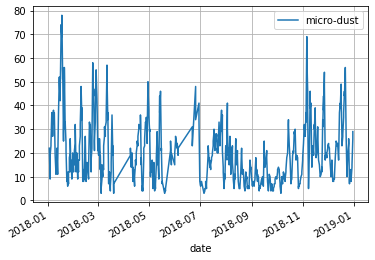

In [5]:
df_jongro.plot(kind='line',x='date',y="micro-dust",grid=True)

### Statistics from DataFrame

In [6]:
# .describe() method : DataFrame의 각 열들에 대한 대한 기술 통계값 출력
df_jongro.describe()

,NO2,O3,CO2,NOx,dust,micro-dust
count,616.000000,616.000000,616.000000,616.000000,615.000000,616.000000
mean,0.034347,0.021211,0.563149,0.004159,34.408130,19.823052
std,0.013720,0.011863,0.212586,0.001435,19.116161,12.897577
min,0.009000,0.002000,0.200000,0.001000,5.000000,3.000000
25%,0.024000,0.012000,0.400000,0.003000,20.500000,10.000000
50%,0.033000,0.020000,0.500000,0.004000,32.000000,17.000000
75%,0.044000,0.028250,0.700000,0.005000,45.000000,26.000000
max,0.086000,0.063000,1.500000,0.011000,119.000000,78.000000


In [7]:
df_jongro[["NO2", "dust"]].describe()

,NO2,dust
count,616.000000,615.000000
mean,0.034347,34.408130
std,0.013720,19.116161
min,0.009000,5.000000
25%,0.024000,20.500000
50%,0.033000,32.000000
75%,0.044000,45.000000
max,0.086000,119.000000


In [8]:
# 특정 열(column)에 대한 평균(mean) 구하기
df_jongro["NO2"].mean()

0.0343474025974026

In [9]:
# 특정 열(column)에 대한 중간값(median) 구하기
df_jongro["NO2"].median()

0.033

In [10]:
# .group_by : DataFrame의 특정 열 값을 기준으로 Group을 만들고 해당 Group 별 기술 통계값 출력 하기
df[["location", "micro-dust"]].groupby("location").mean()

,micro-dust
location,
강남구,20.873786
강남대로,24.441558
강동구,22.718447
강변북로,22.785714
강북구,18.595469
강서구,21.453074
공항대로,25.886731
관악구,25.864078
관악산,19.416667
